In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./data/all_stats.csv')
player_val = pd.read_csv('./data/player_val_cleaned.csv')
player_wages = pd.read_csv('./data/player_wages.csv')

In [3]:
check = player_val['Player'].isin(df['Player'])
player_val[~check]

,Unnamed: 0,#,Player,Nat.,Age,Club,Highest value in career,Last update,Market value


In [4]:
player_val

,Unnamed: 0,#,Player,Nat.,Age,Club,Highest value in career,Last update,Market value
0,0,1,Erling Haaland,NaN,23,NaN,€180.00m,"Dec 19, 2023",€180.00m
1,1,2,Phil Foden,NaN,23,NaN,€130.00m,"Mar 14, 2024",€130.00m
2,2,3,Bukayo Saka,NaN,22,NaN,€130.00m,"Mar 14, 2024",€130.00m
3,3,4,Declan Rice,NaN,25,NaN,€110.00m,"Dec 19, 2023",€110.00m
4,4,5,Rodri,NaN,27,NaN,€110.00m,"Dec 19, 2023",€110.00m
...,...,...,...,...,...,...,...,...,...
95,95,96,Harvey Barnes,NaN,26,NaN,€35.00m,"Dec 19, 2023",€35.00m
96,96,97,Mykhailo Mudryk,NaN,23,NaN,€60.00m,"Mar 14, 2024",€35.00m
97,97,98,Diogo Dalot,NaN,25,NaN,€40.00m,"Dec 19, 2023",€35.00m
98,98,99,Dominic Solanke,NaN,26,NaN,€35.00m,"Mar 14, 2024",€35.00m


In this notebook, my aim is to merge the original dataset with player valuation data. To achieve this, I'll start by merging the tables. Reflecting on the previous notebook where I attained a model with an RMSE of 15, I believe there is room for improvement. Therefore, I'm considering incorporating additional data on player wages to enhance the valuation process further.

### Merge and Clean the Data

In [5]:
df_merge = pd.merge(df, player_val[['Player','Market value']], on=['Player'], how='right')

In [6]:
# Preprocess the Market Value column
df_merge['Market value'] =(df_merge['Market value'].str.replace('€', '')
                              .str.replace('m', '')
                              .astype(float))

In [7]:
df_merge

,Player,Tkl,TklW,Tkl.1,Tkl%,Lost,Blocks,Pass,Int,Tkl+Int,...,Age,90s,Def 3rd,Mid 3rd,Att 3rd,TotDist,PrgDist,1/3,Country,Market value
0,Erling Haaland,5,2,2,100.0,0,9,8,1,6,...,23,21.4,0,3,2,2353,437,13,Norway,180.0
1,Phil Foden,24,14,12,50.0,12,21,21,13,37,...,23,25.7,10,8,6,16235,3052,51,United Kingdom,130.0
2,Bukayo Saka,49,26,20,44.4,25,37,35,10,59,...,22,25.1,18,15,16,13843,3481,29,United Kingdom,130.0
3,Declan Rice,55,34,24,58.5,17,31,21,35,90,...,25,26.6,28,21,6,28518,7674,204,United Kingdom,110.0
4,Rodri,54,33,26,54.2,22,25,18,20,74,...,27,24.1,17,27,10,41853,11449,274,Spain,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Harvey Barnes,3,1,0,0.0,1,0,0,2,5,...,26,4.0,1,2,0,1376,331,5,United Kingdom,35.0
96,Mykhailo Mudryk,18,11,8,34.8,15,10,9,4,22,...,23,10.1,8,5,5,2995,994,16,Ukraine,35.0
97,Diogo Dalot,56,36,35,72.9,13,34,22,27,83,...,25,25.3,41,8,7,18394,5755,77,Portugal,35.0
98,Dominic Solanke,17,9,7,41.2,10,20,16,3,20,...,26,27.7,1,9,7,3712,919,20,United Kingdom,35.0


In [8]:
check = df_merge['Player'].isin(player_wages['Player'])
df_merge[~check]

,Player,Tkl,TklW,Tkl.1,Tkl%,Lost,Blocks,Pass,Int,Tkl+Int,...,Age,90s,Def 3rd,Mid 3rd,Att 3rd,TotDist,PrgDist,1/3,Country,Market value
81,Sandro Tonali,7,7,3,33.3,6,3,3,2,9,...,23,4.9,4,2,1,3776,870,16,Italy,40.0


In [9]:
# Merge with player_wages
df_merge= pd.merge(df_merge,player_wages,on='Player',how='inner')

In [10]:
df_merge

,Player,Tkl,TklW,Tkl.1,Tkl%,Lost,Blocks,Pass,Int,Tkl+Int,...,90s,Def 3rd,Mid 3rd,Att 3rd,TotDist,PrgDist,1/3,Country,Market value,Weekly Wages
0,Erling Haaland,5,2,2,100.0,0,9,8,1,6,...,21.4,0,3,2,2353,437,13,Norway,180.0,375000
1,Phil Foden,24,14,12,50.0,12,21,21,13,37,...,25.7,10,8,6,16235,3052,51,United Kingdom,130.0,225000
2,Bukayo Saka,49,26,20,44.4,25,37,35,10,59,...,25.1,18,15,16,13843,3481,29,United Kingdom,130.0,195000
3,Declan Rice,55,34,24,58.5,17,31,21,35,90,...,26.6,28,21,6,28518,7674,204,United Kingdom,110.0,240000
4,Rodri,54,33,26,54.2,22,25,18,20,74,...,24.1,17,27,10,41853,11449,274,Spain,110.0,220000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Harvey Barnes,3,1,0,0.0,1,0,0,2,5,...,4.0,1,2,0,1376,331,5,United Kingdom,35.0,80000
95,Mykhailo Mudryk,18,11,8,34.8,15,10,9,4,22,...,10.1,8,5,5,2995,994,16,Ukraine,35.0,100000
96,Diogo Dalot,56,36,35,72.9,13,34,22,27,83,...,25.3,41,8,7,18394,5755,77,Portugal,35.0,85000
97,Dominic Solanke,17,9,7,41.2,10,20,16,3,20,...,27.7,1,9,7,3712,919,20,United Kingdom,35.0,50000


In [11]:
df_merge.dtypes

Player           object
Tkl               int64
TklW              int64
Tkl.1             int64
Tkl%            float64
                 ...   
PrgDist           int64
1/3               int64
Country          object
Market value    float64
Weekly Wages      int64
Length: 93, dtype: object

In [12]:
# Select only the numeric columns 
df_numeric = df_merge.select_dtypes(include=['float64', 'int64'])

In [26]:
df_numeric = df_merge[['Rec', 'SCA', 'PassLive', 'PrgP', 'Att.1', 'Cmp.1', 'TotDist',
       'Touches', 'KP', 'Cmp', 'Cmp.3', 'Pass', 'PK', 'GCA',
       'Weekly Wages', 'Dis', 'PassLive.1', 'Carries', '1/3', 'Clr',
       'Sh/90', 'Int', 'G/SoT', 'Tkld%', 'TO.1', 'A-xAG', 'Def 3rd', 'TO',
       'SCA90', 'Att Pen', 'Cmp%.1', '90s', 'PrgR', 'SoT%', 'Cmp%.2',
       'Blocks', 'Age', 'PassDead.1', 'G/Sh', 'G-xG','Market value']]

In [27]:
df_numeric

,Rec,SCA,PassLive,PrgP,Att.1,Cmp.1,TotDist,Touches,KP,Cmp,...,90s,PrgR,SoT%,Cmp%.2,Blocks,Age,PassDead.1,G/Sh,G-xG,Market value
0,353,45,30,18,166,136,2353,462,25,209,...,21.4,93,44.8,81.5,9,23,0,0.17,-2.9,180.0
1,1394,112,89,140,811,761,16235,1708,57,1194,...,25.7,225,41.2,85.7,21,23,1,0.13,2.5,130.0
2,1117,148,107,100,618,549,13843,1553,68,920,...,25.1,422,31.2,76.0,37,22,2,0.12,1.5,130.0
3,1593,68,53,227,821,763,28518,2128,29,1676,...,26.6,39,35.0,94.6,31,25,4,0.15,3.8,110.0
4,2341,121,97,264,1252,1178,41853,2903,35,2433,...,24.1,46,33.3,93.5,25,27,0,0.12,2.7,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,129,9,5,13,72,65,1376,172,2,100,...,4.0,38,33.3,79.5,0,26,0,0.17,0.8,35.0
95,350,32,19,27,188,150,2995,470,15,225,...,10.1,92,29.4,56.3,10,23,1,0.24,1.2,35.0
96,889,55,47,90,568,501,18394,1590,23,1064,...,25.3,87,19.0,81.3,34,25,0,0.05,0.1,35.0
97,560,59,47,46,242,203,3712,819,31,302,...,27.7,139,34.5,73.9,20,26,0,0.17,-1.1,35.0


In [28]:
correlation_matrix = df_numeric.corr()

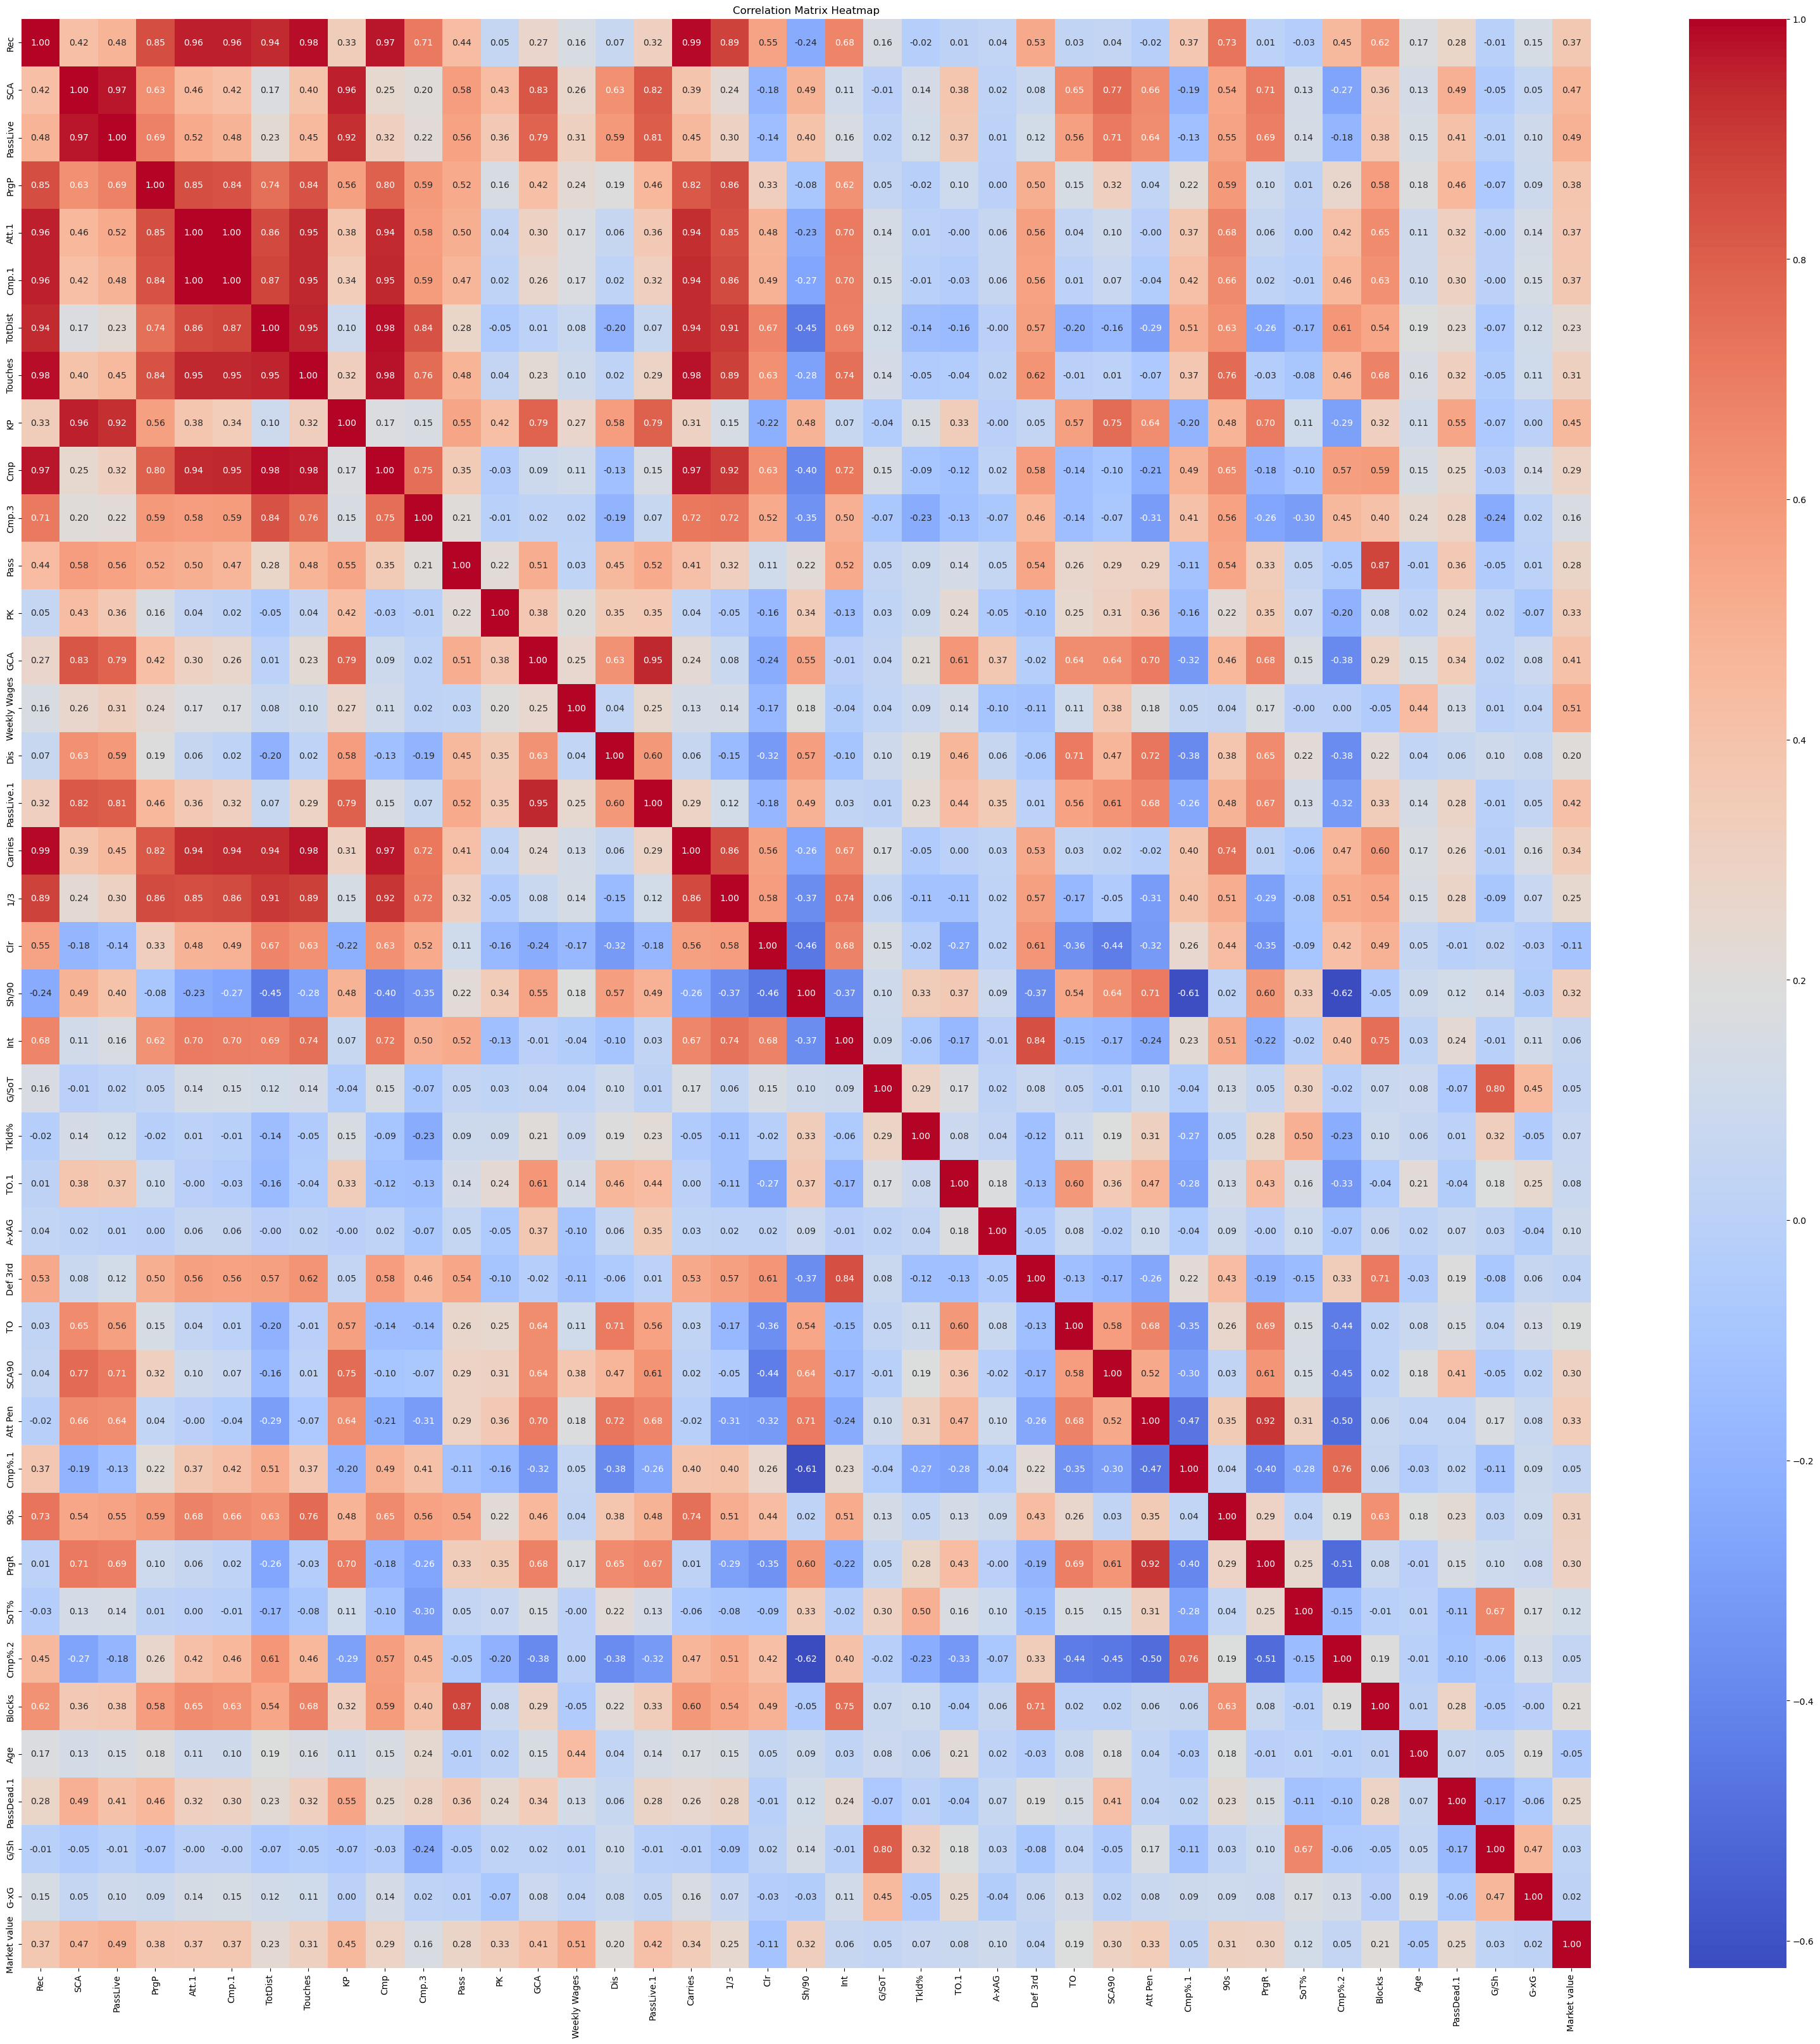

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

### Train the Data

In this project, I will use Root Mean Squared Error as the metrics. The reason is listed below:
- Interpretability: It's expressed in the same units as the target variable.
- Robustness: It's less sensitive to outliers compared to other metrics.
- Model Differentiation: Lower RMSE values indicate better model performance.
- Gradient-based Optimization: It aligns well with optimization algorithms.
- Error Magnitude: It quantifies the typical deviation of predictions from actual values.

In [30]:
from sklearn.model_selection import train_test_split

X = df_numeric.drop(columns=['Market value'])
y = df_numeric['Market value'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model performance using Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred,squared=False)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 29.213617730777734


In [32]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

The initial model yielded unsatisfactory results with an RMSE of 310, likely due to the absence of data preprocessing. To address this, let's attempt to scale the data and reevaluate the model's performance.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluate the model performance using Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred,squared=False)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 29.213617730781788


After scaling the data, the outcome appears unchanged. Let's explore alternative models such as Ridge Regression to introduce regularization, as well as Decision Trees and XGBoost to assess if different modeling approaches yield improved results.

#### Ridge Regression

In [34]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}

# Initialize the Ridge regression model and Gridsearch
ridge_model = Ridge()
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the final Ridge model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Predict the target variable and evaluate

y_pred = best_model.predict(X_test_scaled)
rmse = mean_squared_error(y_test, y_pred,squared=False)

print("Root Mean Squared Error:", rmse)


Best Hyperparameters: {'alpha': 10.0}
Root Mean Squared Error: 29.51149952063129


#### Decision Tree Regressor

In [35]:
from sklearn.tree import DecisionTreeRegressor

# Define the parameter grid for Decision Tree Regressor
param_grid_dt = {
    'max_depth': [None, 5, 10, 15], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

# Initialize the Decision Tree Regressor model and GridSearch
dt_model = DecisionTreeRegressor(random_state=42)
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, scoring='neg_mean_squared_error', cv=5)
grid_search_dt.fit(X_train_scaled, y_train)

# Get the best hyperparameters for Decision Tree Regressor
best_params_dt = grid_search_dt.best_params_
print("Best Hyperparameters for Decision Tree Regressor:", best_params_dt)

# Train the final Decision Tree Regressor model with the best hyperparameters
best_dt_model = grid_search_dt.best_estimator_
best_dt_model.fit(X_train_scaled, y_train)

# Predict the target variable and evaluate
y_pred = best_dt_model.predict(X_test_scaled)
rmse = mean_squared_error(y_test, y_pred,squared=False)
print("Root Mean Squared Error for Decision Tree Regressor:", rmse)


Best Hyperparameters for Decision Tree Regressor: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Root Mean Squared Error for Decision Tree Regressor: 38.88400035865878


#### XGBoost Regressor

In [36]:
import xgboost as xgb

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'max_depth': [3, 5, 7], 
    'min_child_weight': [1, 3, 5],  
    'subsample': [0.5, 0.7, 1.0], 
    'colsample_bytree': [0.5, 0.7, 1.0]  
}

# Initialize the XGBoost Regressor model and GridSearch
xgb_model = xgb.XGBRegressor(random_state=42)
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, scoring='neg_mean_squared_error', cv=5)
grid_search_xgb.fit(X_train, y_train)

# Get the best hyperparameters for XGBoost
best_params_xgb = grid_search_xgb.best_params_
print("Best Hyperparameters for XGBoost:", best_params_xgb)

# Train the final XGBoost model with the best hyperparameters
best_xgb_model = grid_search_xgb.best_estimator_
best_xgb_model.fit(X_train, y_train)

# Predict the target variable and evaluate
y_pred_xgb = best_xgb_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred_xgb,squared=False)

print("Root Mean Squared Error for XGBoost:", rmse)


Best Hyperparameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'subsample': 0.5}
Root Mean Squared Error for XGBoost: 31.53987974035005


In [25]:
# Get feature importances
feature_importances = best_xgb_model.feature_importances_

# Create a DataFrame to store feature importances with their corresponding names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Get the top 20 features
top_20_features = feature_importance_df.head(20)

print("Top 20 Features:")
print(top_20_features)

Top 20 Features:
         Feature  Importance
4          Att.1    0.105592
0            Rec    0.094902
17       Carries    0.093844
3           PrgP    0.092500
14  Weekly Wages    0.091248
5          Cmp.1    0.088010
8             KP    0.077062
1            SCA    0.057408
16    PassLive.1    0.054860
7        Touches    0.042905
11          Pass    0.035314
15           Dis    0.031071
18           1/3    0.020681
9            Cmp    0.019298
2       PassLive    0.018685
10         Cmp.3    0.017786
13           GCA    0.016645
19           Clr    0.015557
6        TotDist    0.013734
12            PK    0.012898


The XGBoost regression model outperformed the Decision Tree regressor and Ridge Regression, yielding the lowest RMSE of 15.8 compared to 20.6 and 33.1, respectively. Therefore, the conclusion is that the XGBoost regressor is superior to the Decision Tree regressor, which in turn is better than Ridge Regression.

### Test the Model

In [16]:
def predict_valuation(df,name,model):
    df=df[df['Player']==name]
    df = df.select_dtypes(include=['float64', 'int64'])
    result = model.predict(df)
    print(name,'valuation: ', result[0])

In [17]:
predict_valuation(df,'Lewis Dunk',best_model)

Lewis Dunk valuation:  70.8705691697637
